In [73]:
import numpy as np
import pandas as pd

df=pd.read_csv('/content/train.csv')
df

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [74]:
df.corr()['MedHouseVal']

,MedHouseVal
id,-0.001358
MedInc,0.701925
HouseAge,0.103210
AveRooms,0.366727
AveBedrms,-0.067487
Population,-0.038479
AveOccup,-0.048475
Latitude,-0.116499
Longitude,-0.056742
MedHouseVal,1.000000


In [75]:
from copy import deepcopy

Value = df['MedHouseVal']
df = df.drop(['id', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'], axis=1)
df['Value'] = Value
df

,MedInc,AveRooms,Value
0,2.3859,3.827160,0.980
1,3.7188,6.013373,0.946
2,4.7750,6.535604,1.576
3,2.4138,3.350203,1.336
4,3.7500,4.284404,4.500
...,...,...,...
37132,3.3438,4.936508,1.856
37133,3.7308,5.087533,1.588
37134,4.1716,4.678862,3.387
37135,2.7143,5.710074,1.592


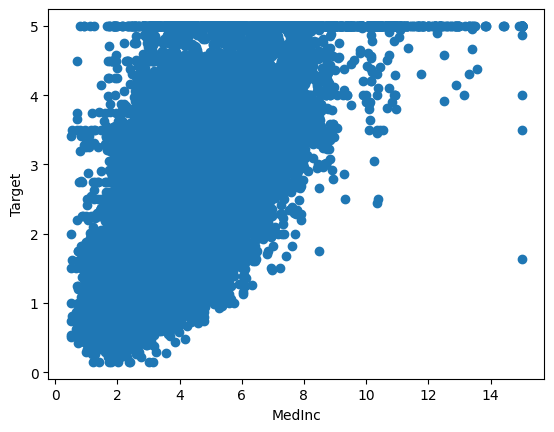

In [76]:
import matplotlib.pyplot as plt

plt.scatter(df['MedInc'], df['Value'])
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.show()

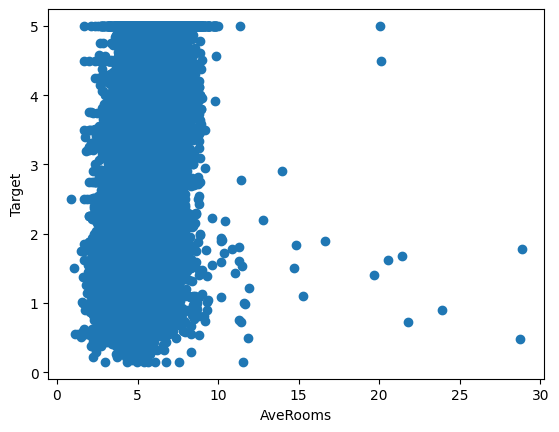

In [77]:
import matplotlib.pyplot as plt

plt.scatter(df['AveRooms'], df['Value'])
plt.xlabel('AveRooms')
plt.ylabel('Target')
plt.show()

In [78]:
df_np=df.to_numpy()
df_np.shape

(37137, 3)

In [79]:
x_train = df[['MedInc', 'AveRooms']].to_numpy()
y_train = df['Value'].to_numpy()

x_train.shape, y_train.shape

((37137, 2), (37137,))

In [80]:
x_train

array([[2.3859    , 3.82716049],
       [3.7188    , 6.01337296],
       [4.775     , 6.53560372],
       ...,
       [4.1716    , 4.67886179],
       [2.7143    , 5.71007371],
       [2.2419    , 5.4244186 ]])

In [81]:
y_train

array([0.98 , 0.946, 1.576, ..., 3.387, 1.592, 0.652])

In [82]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b
            error = y_pred - y

            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [83]:
model = LinearRegression(learning_rate=0.01, epochs=5000)
model.fit(x_train, y_train)
predictions = model.predict(x_train)

Let's see predicted vs actual

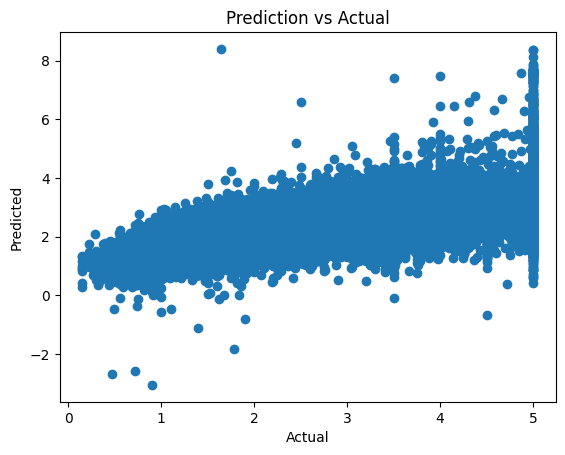

In [84]:
plt.scatter(y_train, predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediction vs Actual")
plt.show()


In [85]:
test=pd.read_csv('/content/test.csv')
test_id=test['id']
x_test=test[['MedInc','AveRooms']].to_numpy()

In [86]:
y_predicted_test=model.predict(x_test)

In [87]:
df_pred = pd.DataFrame({'id': test_id, 'MedHouseVal': y_predicted_test})
df_pred.to_csv('assgn1.csv', index=False)
